In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt 
import seaborn as sns

READING DATA

In [2]:
df=pd.read_csv("smoke_detection_iot.csv")

EDA

In [3]:
print(df.isnull().sum())


Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64


In [4]:
print(df.duplicated().sum())

0


In [5]:
print(df.describe())

         Unnamed: 0           UTC  Temperature[C]   Humidity[%]     TVOC[ppb]  \
count  62630.000000  6.263000e+04    62630.000000  62630.000000  62630.000000   
mean   31314.500000  1.654792e+09       15.970424     48.539499   1942.057528   
std    18079.868017  1.100025e+05       14.359576      8.865367   7811.589055   
min        0.000000  1.654712e+09      -22.010000     10.740000      0.000000   
25%    15657.250000  1.654743e+09       10.994250     47.530000    130.000000   
50%    31314.500000  1.654762e+09       20.130000     50.150000    981.000000   
75%    46971.750000  1.654778e+09       25.409500     53.240000   1189.000000   
max    62629.000000  1.655130e+09       59.930000     75.200000  60000.000000   

          eCO2[ppm]        Raw H2   Raw Ethanol  Pressure[hPa]         PM1.0  \
count  62630.000000  62630.000000  62630.000000   62630.000000  62630.000000   
mean     670.021044  12942.453936  19754.257912     938.627649    100.594309   
std     1905.885439    272.464

In [6]:
print(df.corr()["Fire Alarm"])

Unnamed: 0       -0.361351
UTC              -0.389404
Temperature[C]   -0.163902
Humidity[%]       0.399846
TVOC[ppb]        -0.214743
eCO2[ppm]        -0.097006
Raw H2            0.107007
Raw Ethanol      -0.340652
Pressure[hPa]     0.249797
PM1.0            -0.110552
PM2.5            -0.084916
NC0.5            -0.128118
NC1.0            -0.082828
NC2.5            -0.057707
CNT               0.673762
Fire Alarm        1.000000
Name: Fire Alarm, dtype: float64


DEFINING FEATURES AND LABELS

In [7]:
Pres=np.array((df['Pressure[hPa]'].values).reshape(-1,1))
Temp=np.array((df['Temperature[C]'].values).reshape(-1,1))
Hum=np.array((df['Humidity[%]'].values).reshape(-1,1))

In [8]:
Features = np.concatenate((Pres,Temp,Hum),axis=1)

In [9]:
Label = np.array((df["Fire Alarm"].values).reshape(-1,1))

TRAINING MODEL

In [10]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(Features, Label, test_size=0.3, random_state=42)

In [11]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')

In [12]:

svm_model.fit(x_train, y_train)

c:\Users\patid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

TESTING MODEL

In [13]:
y_pred = svm_model.predict(x_test)

In [14]:
from sklearn.metrics import classification_report as cr
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.23      0.35      5435
           1       0.76      0.98      0.85     13354

    accuracy                           0.76     18789
   macro avg       0.78      0.60      0.60     18789
weighted avg       0.77      0.76      0.71     18789



[Text(0, 0.5, 'No Smoke'), Text(0, 1.5, 'Smoke')]

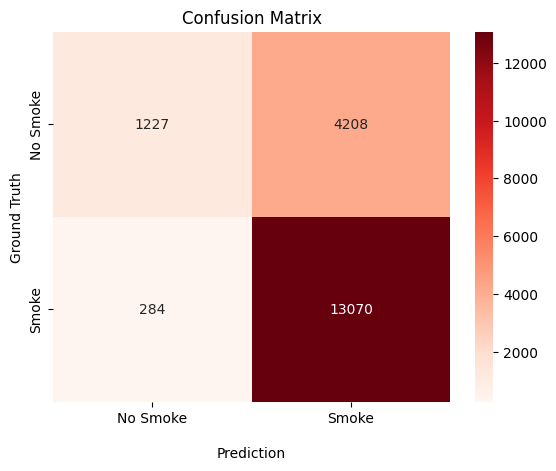

In [15]:
from sklearn.metrics import confusion_matrix as cm
confusion_matrix = cm(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap='Reds')
ax.set_title("Confusion Matrix");
ax.set_xlabel('\nPrediction')
ax.set_ylabel('Ground Truth');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Smoke','Smoke'])
ax.yaxis.set_ticklabels(['No Smoke','Smoke'])

In [16]:
from sklearn.metrics import jaccard_score as js
print(js(y_test,y_pred))

0.7442204760277873
